# #105

## Import Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings ('ignore')
plt.style.use ('seaborn')

## Import Dataset:

In [2]:
Data = pd.read_csv ("F:/IMT/ML/Country-data.csv")
df = pd.DataFrame (Data)
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


### About Features:
#### child_mort: Death of children under 5 years of age per 1000 live births.
#### exports: Exports of goods and services per capita. Given as %age of the GDP per capita.
#### health: Total health spending per capita. Given as %age of the GDP per capita,
#### imports: Imports of goods and services per capita. Given as %age of the GDP per capita.
#### income: Net income per person.
#### inflation: The measurement of the annual growth rate of the total GDP.
#### life_expec: The average number of years a new born child would live if the current mortality patterns are to remain the same.
#### total_fer: The number of children that would be born to each woman if the current age-fertility rates remain the same.
#### gdpp: The GDP per capita. Calculated as the Total GDP divided by the total population.

## Data Information:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
df.shape

(167, 10)

In [5]:
df.describe (include='all')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
unique,167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,NaN,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,NaN,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,NaN,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,NaN,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,NaN,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000


In [6]:
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

#### There isn't any missing value or NaN in this dataset.

# PreProcessing:

In [7]:
df1 = df.drop ('country', axis = 1)    # I drop this column to draw heatmap

<Axes: >

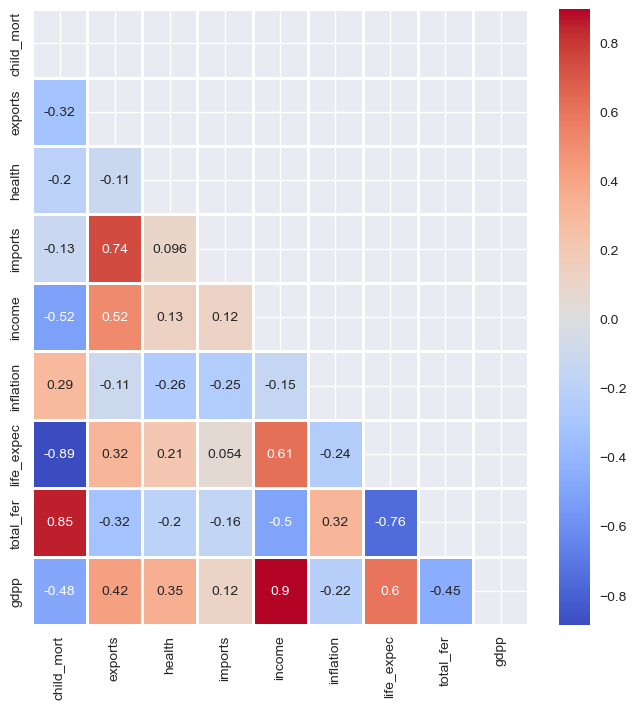

In [8]:
plt.figure (figsize = (8,8))
sns.heatmap (df1.corr(), annot = True, linewidth = 1, cmap = "coolwarm", mask = np.triu (df1.corr()))

### According to the correlation matrix, we find that the correlation between several pairs of features is significant.
### As a result, we draw a scatter plot, for these pairs of features so that we can check their relationship with a more open view.

### income and gdpp have the highest correlation (90%)
### life_expec and child_mort have -89% correlation.
### total_fer and child_mort have 85% correlation.
### total_fer and life_expec have -76% correlation.
### imports and exports have 74% correlation.
### life_expec and income have 61% correlation.
### ggdp and life_expec have 60% correlation.
### income and exports have 52% correlation.
### income and child_mort have -52% correlation.
### total_fer and income have -50% correlation.

### * *The plot below show the data scatter.*

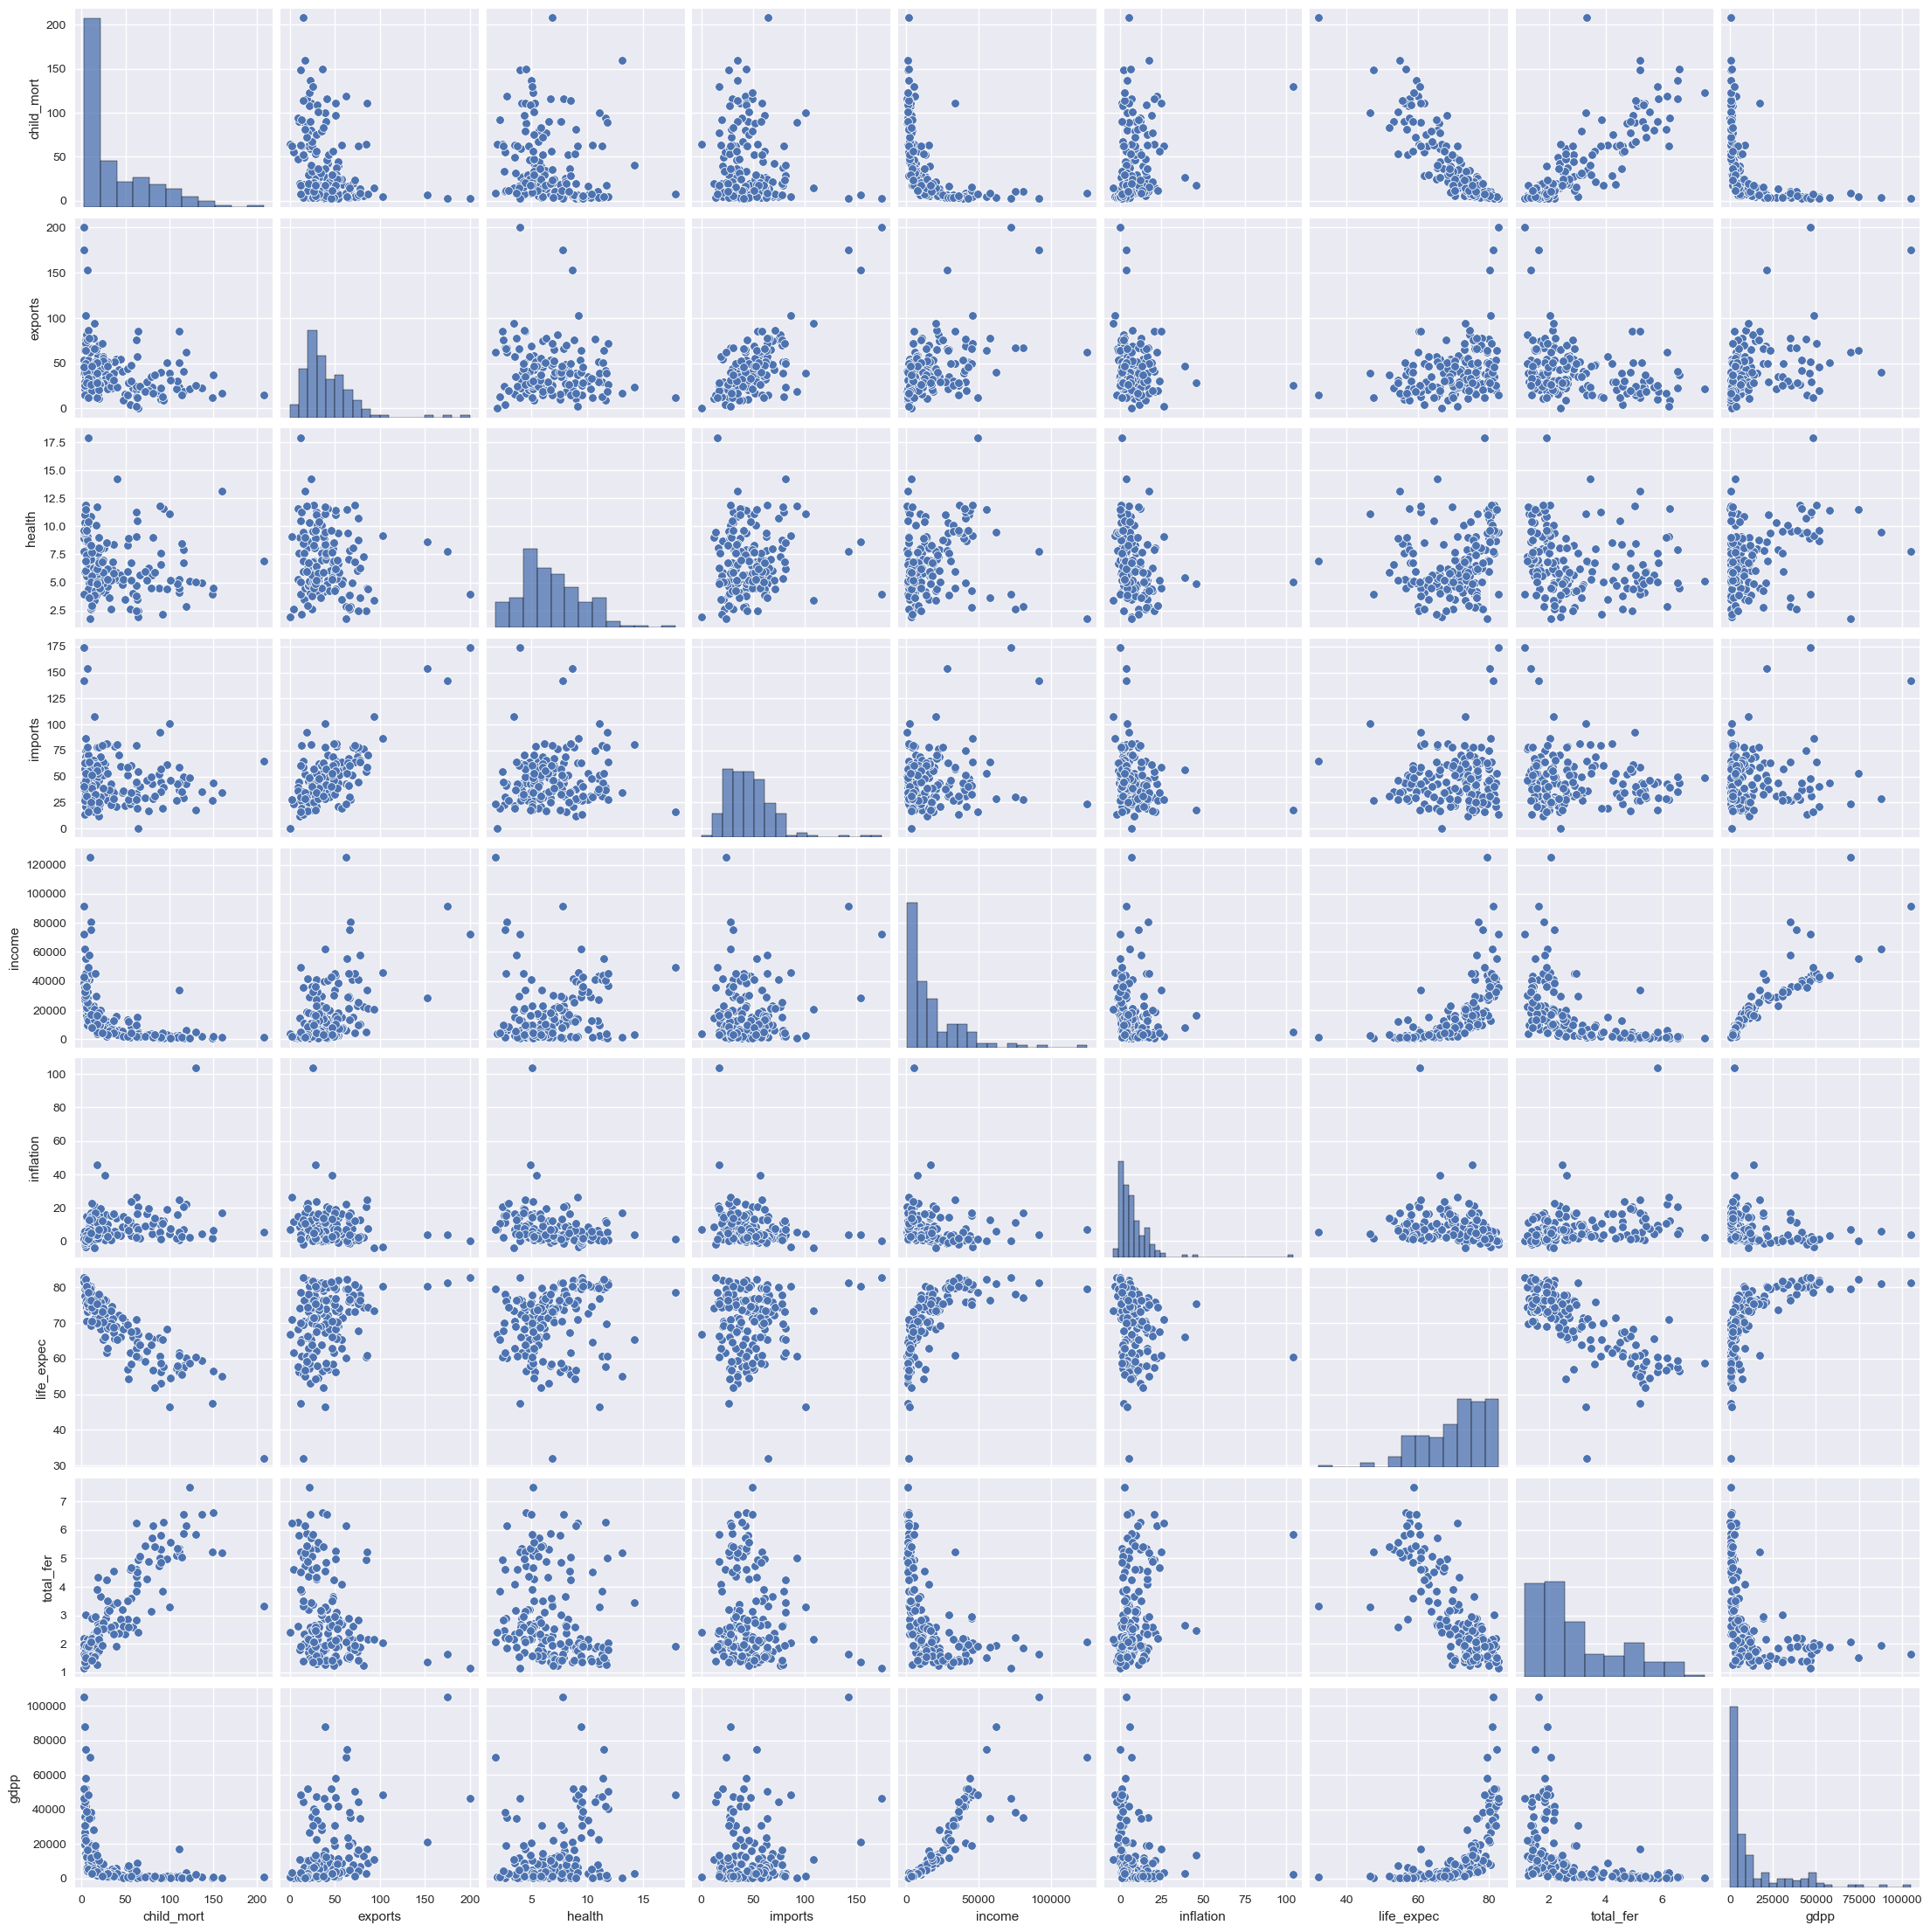

In [9]:
sns.pairplot (df)

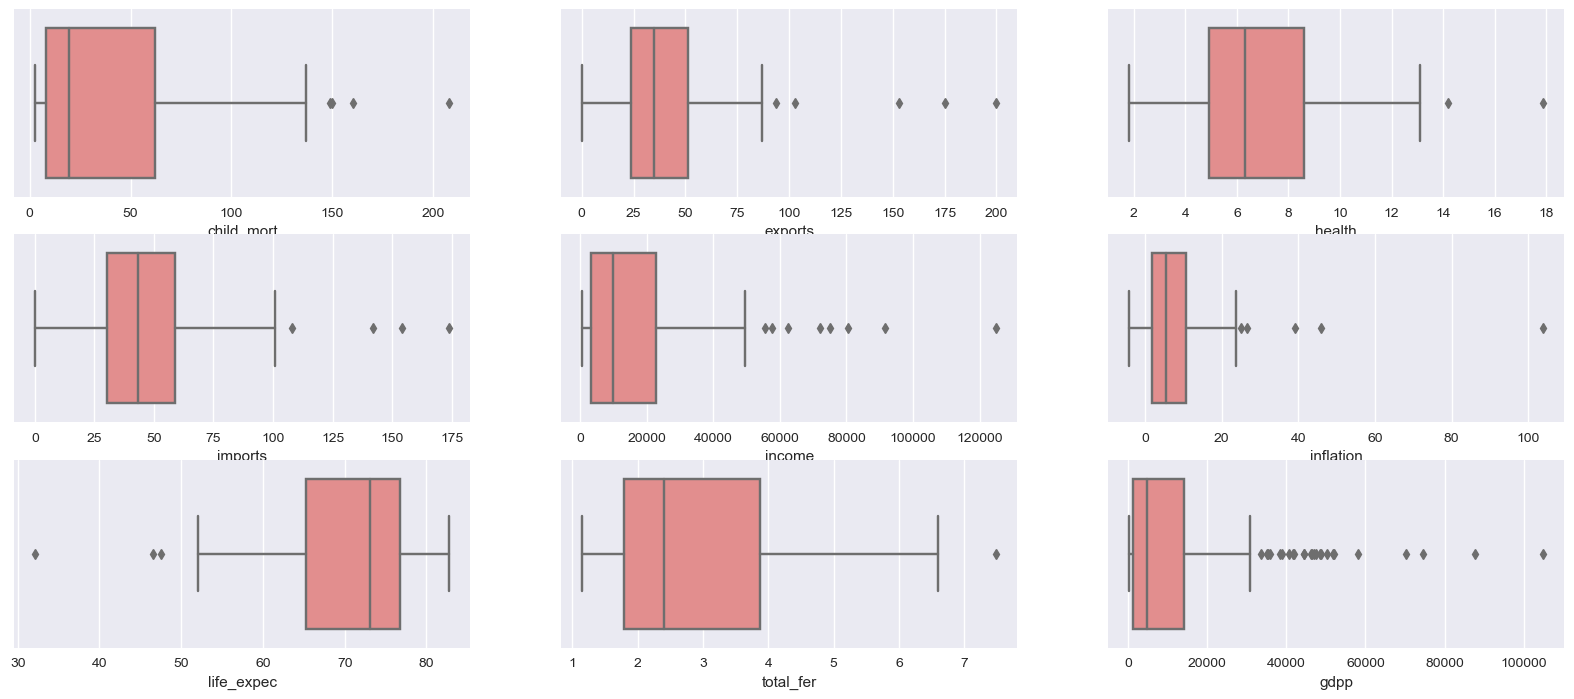

In [10]:
plt.subplots (figsize=(20, 20))
for i, column in enumerate (df1.columns,1):
    plt.subplot (7, 3, i)
    sns.boxplot (df1[column], x= df1[column], color= 'lightcoral')

### This dataset has too many outliers. But I decide to keep them because every data is important here. Also, the data set is small.

In [11]:
world = gpd.read_file (gpd.datasets.get_path ('naturalearth_lowres'))
merged_df_with_world = pd.merge (df, world[['name', 'continent']], left_on = 'country', right_on = 'name', how = 'left')
gp_continent = merged_df_with_world.groupby ('continent')

In [12]:
for continent, group in gp_continent:
    countries = group ['country'].tolist()
    print (f'{continent}: {countries}')

Africa: ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Chad', 'Egypt', 'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Senegal', 'Sierra Leone', 'South Africa', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia']
Asia: ['Afghanistan', 'Armenia', 'Azerbaijan', 'Bangladesh', 'Bhutan', 'Brunei', 'Cambodia', 'China', 'Cyprus', 'Georgia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Lebanon', 'Malaysia', 'Mongolia', 'Myanmar', 'Nepal', 'Oman', 'Pakistan', 'Philippines', 'Qatar', 'Saudi Arabia', 'South Korea', 'Sri Lanka', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Yemen']
Europe: ['Albania', 'Austria', 'Belarus', 'Belgium', 'Bulgaria', 'Croatia', 'Denmark', 'Es

In [13]:
count = merged_df_with_world['continent'].value_counts()
count

continent
Asia             40
Africa           38
Europe           34
South America    12
North America     9
Oceania           4
Name: count, dtype: int64

### This graph shows the number of countries in each continent in this data set:

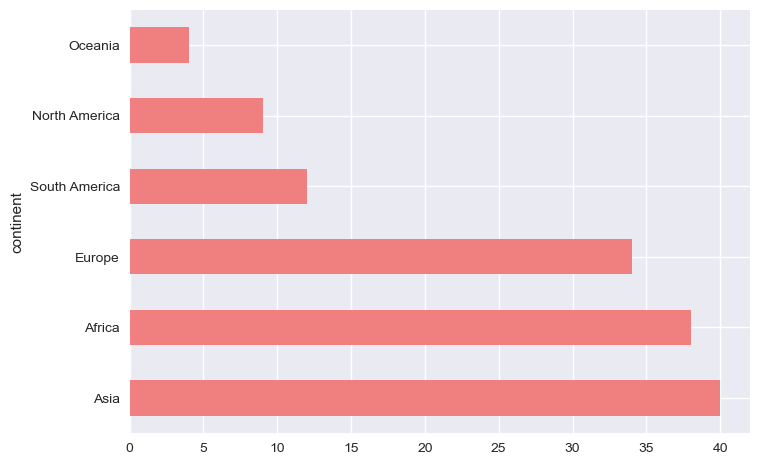

In [14]:
count.plot (kind = 'barh', color = 'lightcoral')
plt.show ()

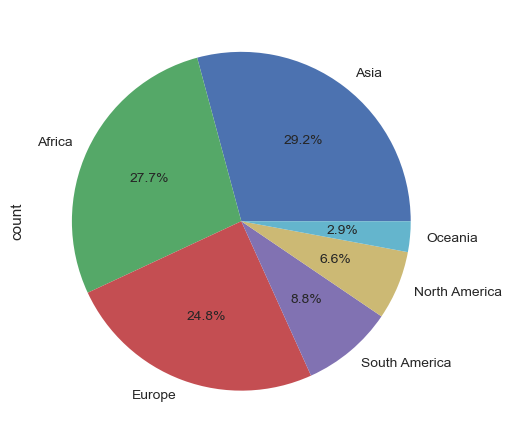

In [15]:
count.plot (kind = 'pie', autopct = lambda p: '{:.1f}%'.format(p) if p>0 else '')
plt.show ()

In [16]:
merged = world.merge (df, how = 'left', left_on = 'name', right_on = 'country')
merged

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,24.1,57.8,4.86,63.9,7350.0,4.23,65.3,2.67,3650.0
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,71.9,18.7,6.01,29.1,2090.0,9.25,59.3,5.43,702.0
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,5.6,29.1,11.30,31.0,40700.0,2.87,81.3,1.63,47400.0
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",Serbia,7.6,32.9,10.40,47.9,12700.0,5.88,74.7,1.40,5410.0
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",Montenegro,6.8,37.0,9.11,62.7,14000.0,1.60,76.4,1.77,6680.0
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


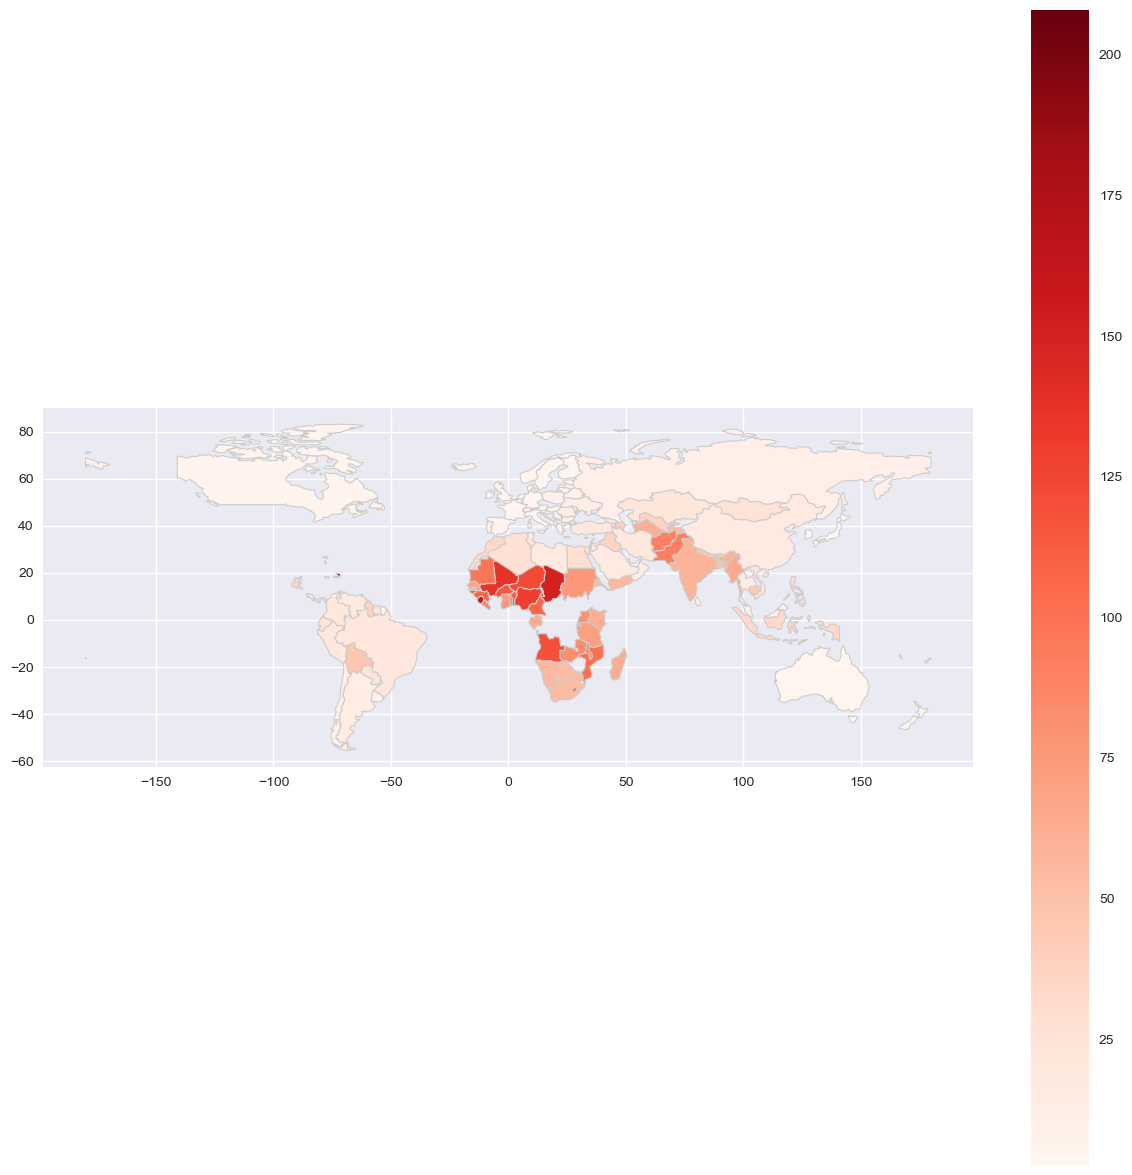

In [18]:
fig, ax = plt.subplots (1, 1, figsize = (15, 15))
merged.plot (column = 'child_mort', cmap = 'Reds', linewidth = 0.8, ax = ax, edgecolor = '0.8', legend = True)
plt.show()

### According to the map above, countries shown in dark red have higher child-morth than countries in light red. (*African countries, Afghanistan, Pakistan, India and ...*)

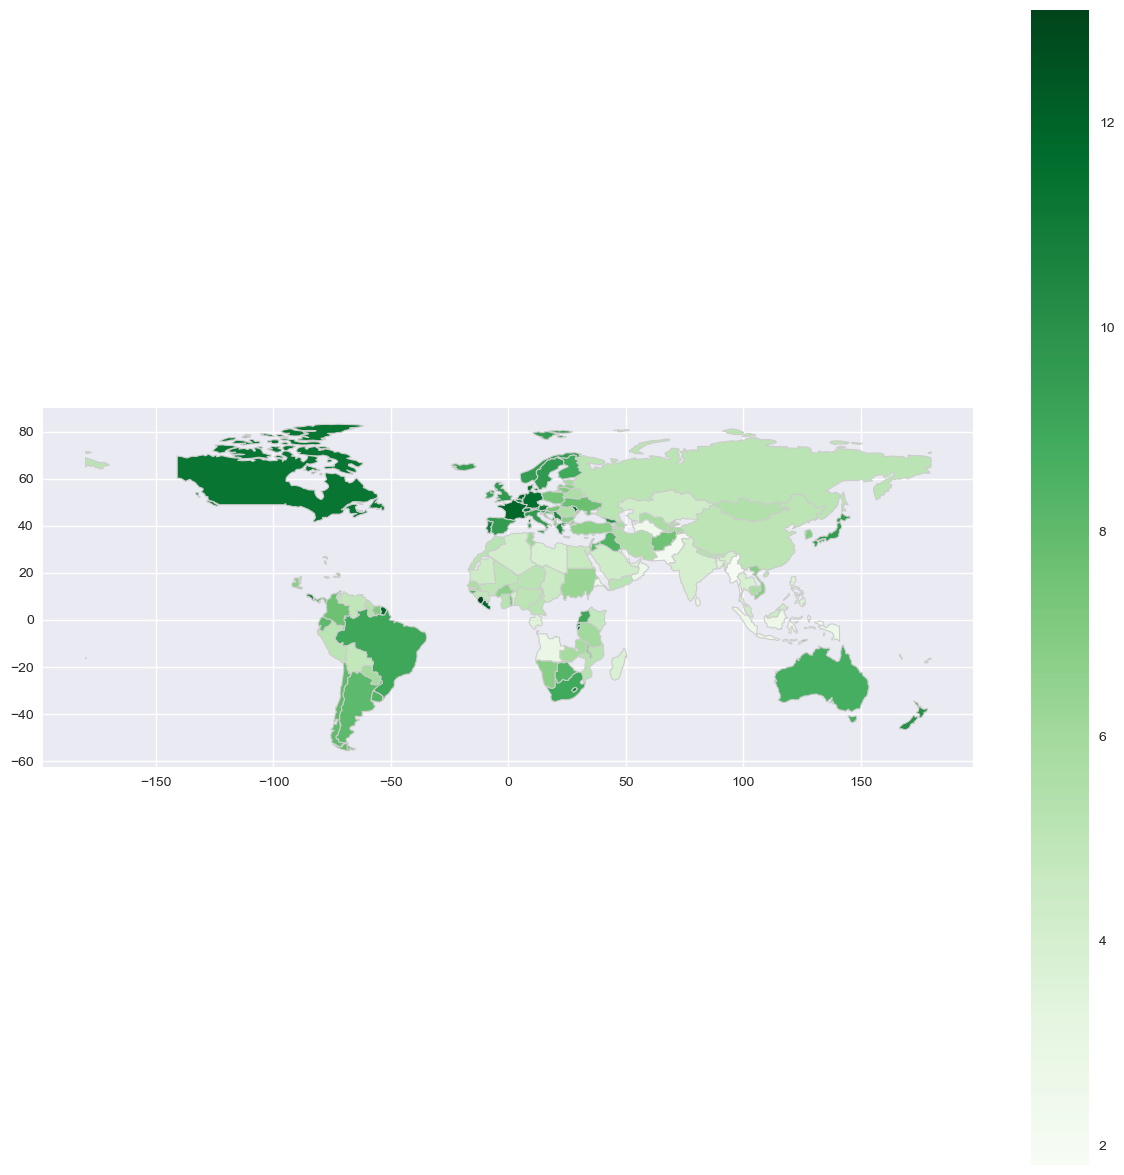

In [19]:
fig, ax = plt.subplots (1, 1, figsize = (15, 15))
merged.plot (column = 'health', cmap = 'Greens', linewidth = 0.8, ax = ax, edgecolor = '0.8', legend = True)
plt.show()

In [20]:
df['health'].nsmallest(6)

123    1.81
107    1.97
116    2.20
38     2.46
154    2.50
70     2.61
Name: health, dtype: float64

In [21]:
Low_health= df[df['health']  <= 2.61]
Low_health

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
38,"Congo, Rep.",63.9,85.100,2.46,54.7000,5190,20.70,60.4,4.95,2740
70,Indonesia,33.3,24.300,2.61,22.4000,8430,15.30,69.9,2.48,3110
107,Myanmar,64.4,0.109,1.97,0.0659,3720,7.04,66.8,2.41,988
116,Pakistan,92.1,13.500,2.20,19.4000,4280,10.90,65.3,3.85,1040
123,Qatar,9.0,62.300,1.81,23.8000,125000,6.98,79.5,2.07,70300
154,Turkmenistan,62.0,76.300,2.50,44.5000,9940,2.31,67.9,2.83,4440


### According to the map, countries shown in light Green have low health than countries in dark Green. (*Qatar??,Myanmar, Pakistan,Congo, Rep. , Turkmenistan, Indonesia*)

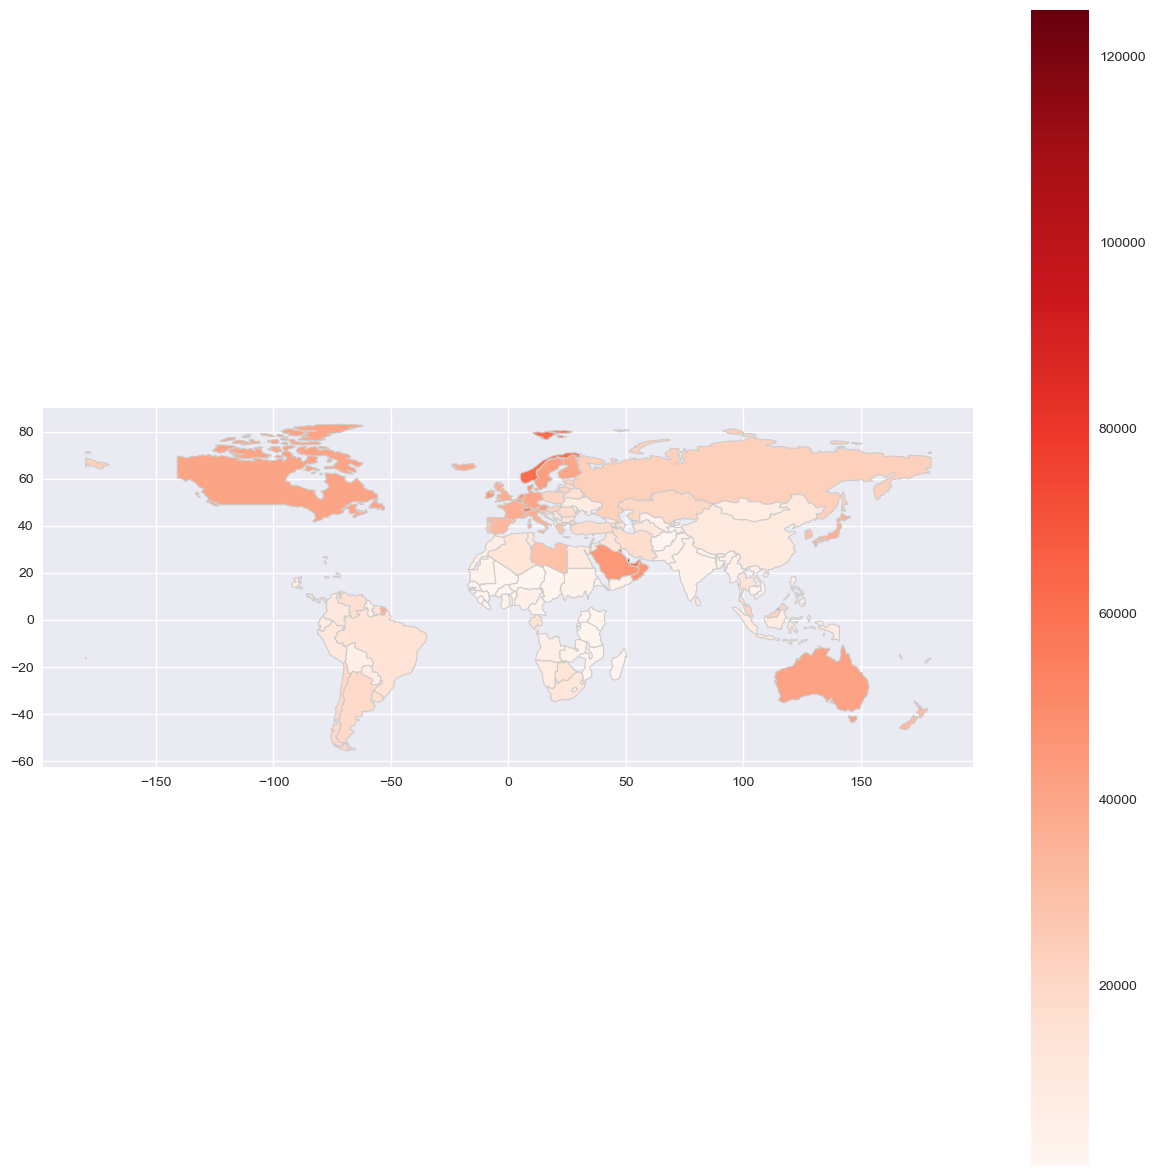

In [22]:
fig, ax = plt.subplots (1, 1, figsize = (15, 15))
merged.plot (column = 'income', cmap = 'Reds', linewidth = 0.8, ax = ax, edgecolor = '0.8', legend = True)
plt.show()

### The map above shows the income of different countries. light red countries have less income than other countries.

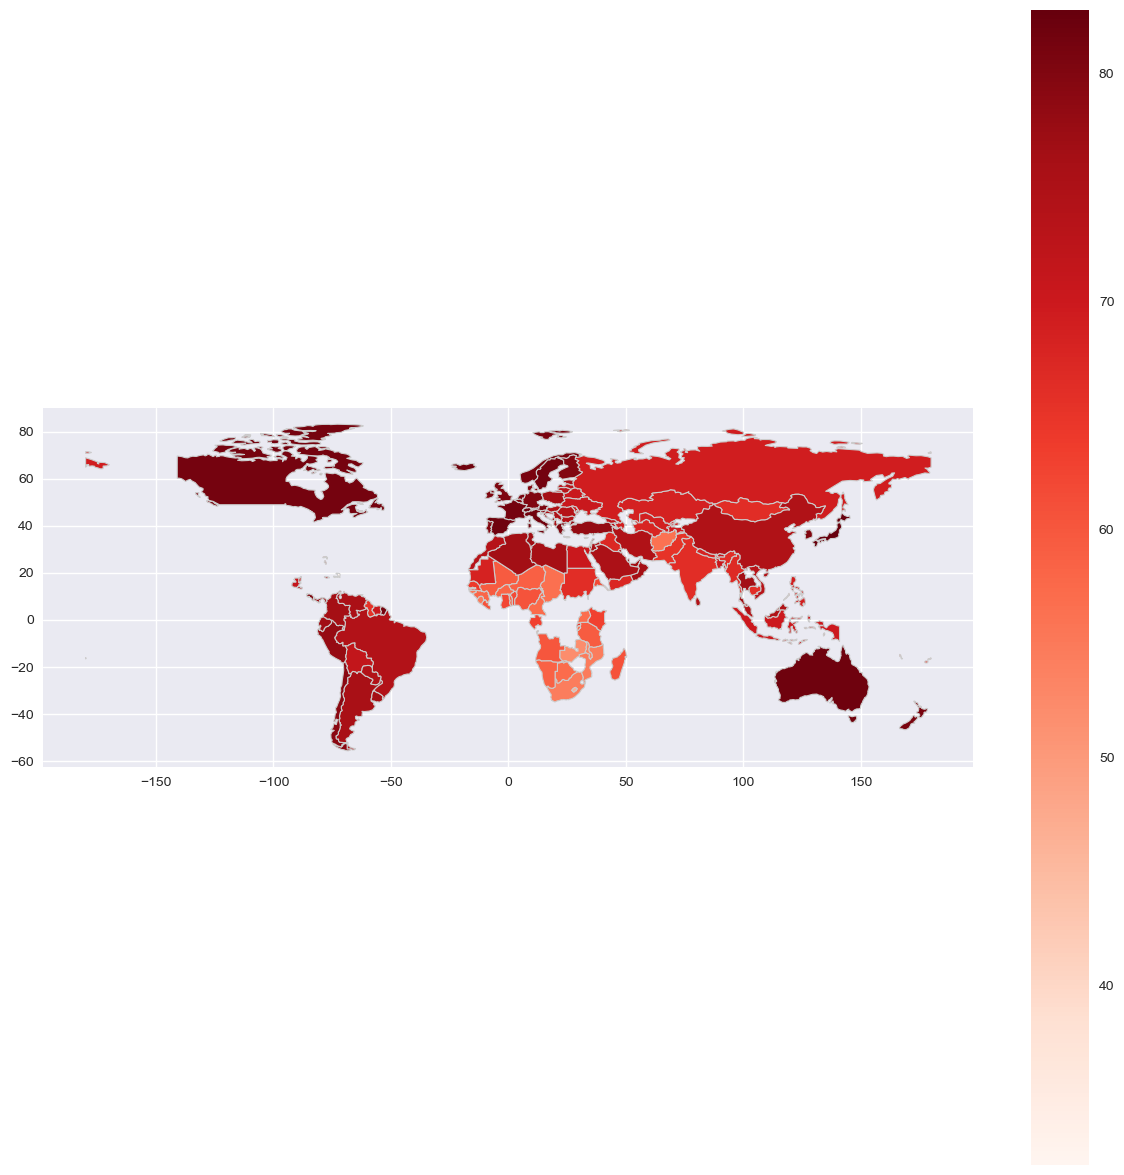

In [24]:
fig, ax = plt.subplots (1, 1, figsize = (15, 15))
merged.plot (column = 'life_expec', cmap = 'Reds', linewidth = 0.8, ax = ax, edgecolor = '0.8', legend = True)
plt.show()

### life_expec in Africa and several countries in the middle east is less than other countries.

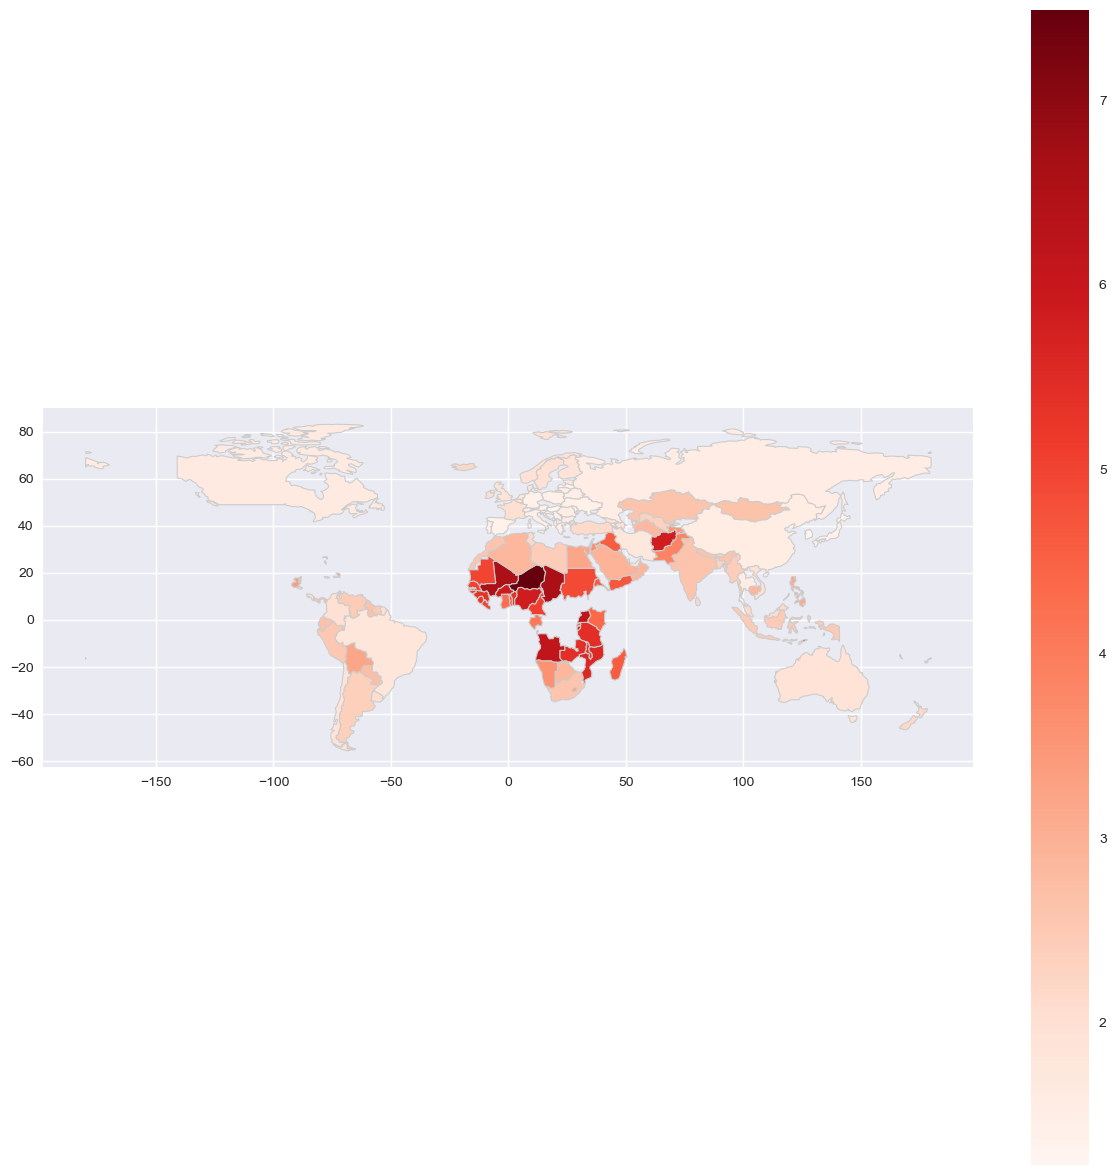

In [26]:
fig, ax = plt.subplots (1, 1, figsize = (15, 15))
merged.plot (column = 'total_fer', cmap = 'Reds', linewidth = 0.8, ax = ax, edgecolor = '0.8', legend = True)
plt.show()

### according to map "the number of children that would be born to each woman if the current age-fertility rates remain the same" in Africa and most countries of Middle East is the most.

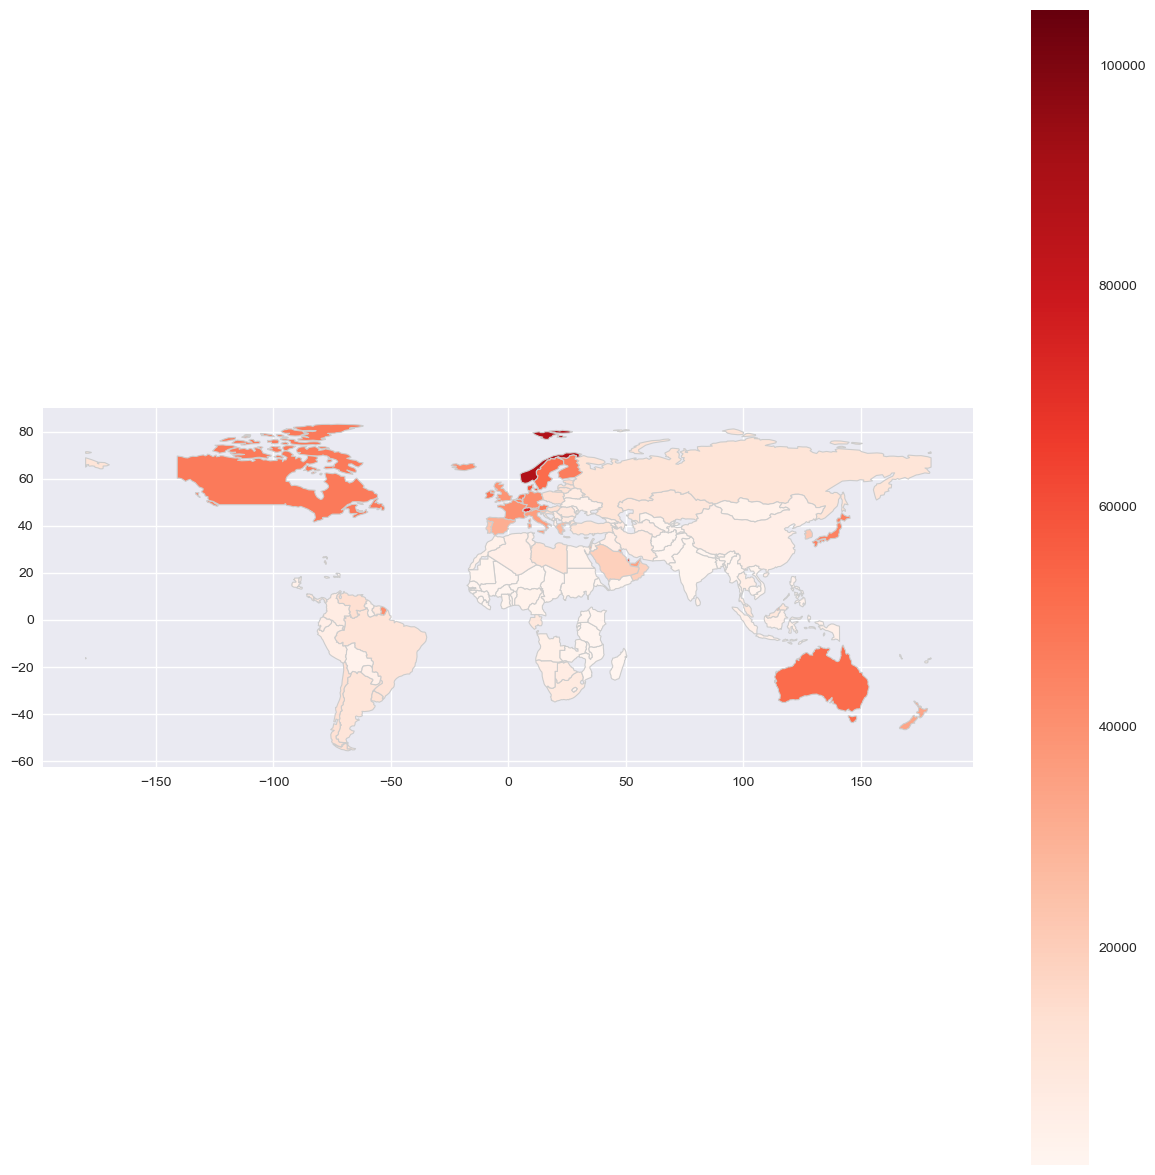

In [27]:
fig, ax = plt.subplots (1, 1, figsize = (15, 15))
merged.plot (column = 'gdpp', cmap = 'Reds', linewidth = 0.8, ax = ax, edgecolor = '0.8', legend = True)
plt.show()

#### gdpp in some countries of Africa and the middle east is less than other.

## Focus on Asia and Africa:

In [28]:
Asia = merged_df_with_world [merged_df_with_world.continent == 'Asia']
Asia.reset_index(drop=True, inplace=True)
Asia

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,name,continent
0,Afghanistan,90.2,10.000,7.58,44.9000,1610,9.440,56.2,5.82,553,Afghanistan,Asia
1,Armenia,18.1,20.800,4.40,45.3000,6700,7.770,73.3,1.69,3220,Armenia,Asia
2,Azerbaijan,39.2,54.300,5.88,20.7000,16000,13.800,69.1,1.92,5840,Azerbaijan,Asia
3,Bangladesh,49.4,16.000,3.52,21.8000,2440,7.140,70.4,2.33,758,Bangladesh,Asia
4,Bhutan,42.7,42.500,5.20,70.7000,6420,5.990,72.1,2.38,2180,Bhutan,Asia
5,Brunei,10.5,67.400,2.84,28.0000,80600,16.700,77.1,1.84,35300,Brunei,Asia
6,Cambodia,44.4,54.100,5.68,59.5000,2520,3.120,66.1,2.88,786,Cambodia,Asia
7,China,15.7,26.300,5.07,22.6000,9530,6.940,74.6,1.59,4560,China,Asia
8,Cyprus,3.6,50.200,5.97,57.5000,33900,2.010,79.9,1.42,30800,Cyprus,Asia
9,Georgia,16.5,35.000,10.10,52.8000,6730,8.550,72.8,1.92,2960,Georgia,Asia


In [29]:
Africa = merged_df_with_world [merged_df_with_world.continent == 'Africa']
Africa.reset_index(drop=True, inplace=True)
Africa

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,name,continent
0,Algeria,27.3,38.40,4.17,31.4,12900,16.100,76.5,2.89,4460,Algeria,Africa
1,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,Angola,Africa
2,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,Benin,Africa
3,Botswana,52.5,43.60,8.30,51.3,13300,8.920,57.1,2.88,6350,Botswana,Africa
4,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,Burkina Faso,Africa
5,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,Burundi,Africa
6,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,Cameroon,Africa
7,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,Chad,Africa
8,Egypt,29.1,21.30,4.66,26.6,9860,10.100,70.5,3.19,2600,Egypt,Africa
9,Eritrea,55.2,4.79,2.66,23.3,1420,11.600,61.7,4.61,482,Eritrea,Africa


In [30]:
Asia.sort_values( by="health" , inplace = True)

Text(0, 0.5, 'health')

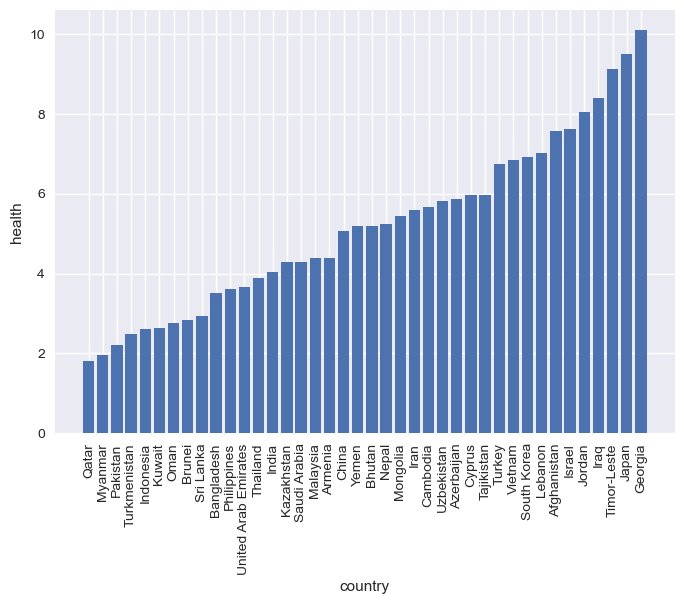

In [31]:
plt.bar (Asia['country'], Asia['health'])
plt.xticks (rotation = 90)
plt.xlabel ('country')
plt.ylabel ('health')

In [32]:
Africa.sort_values( by="health" , inplace = True)

Text(0, 0.5, 'health')

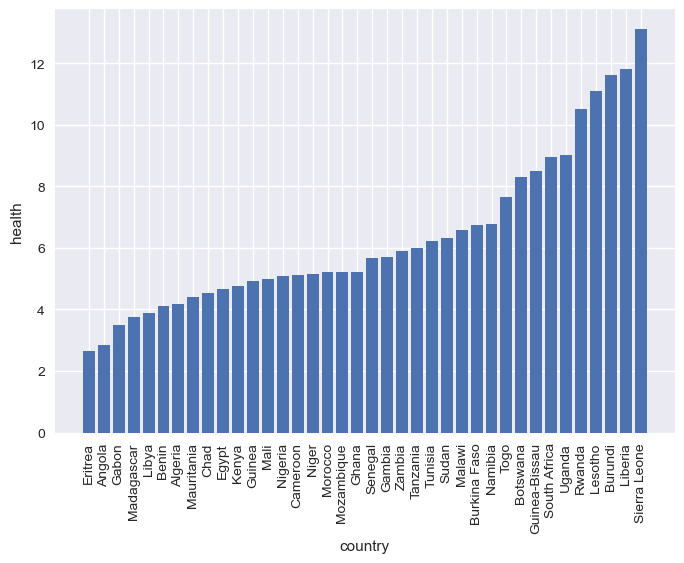

In [33]:
plt.bar (Africa['country'], Africa['health'])
plt.xticks (rotation = 90)
plt.xlabel ('country')
plt.ylabel ('health')

In [34]:
Asia.sort_values( by="income" , inplace = True)

Text(0, 0.5, 'income')

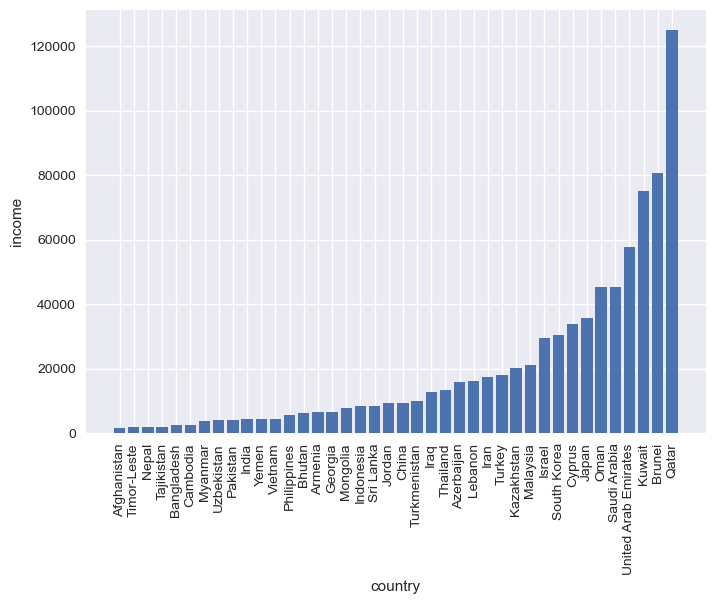

In [35]:
plt.bar (Asia['country'], Asia['income'])
plt.xticks (rotation = 90)
plt.xlabel ('country')
plt.ylabel ('income')

In [36]:
Africa.sort_values( by="income" , inplace = True)

Text(0, 0.5, 'income')

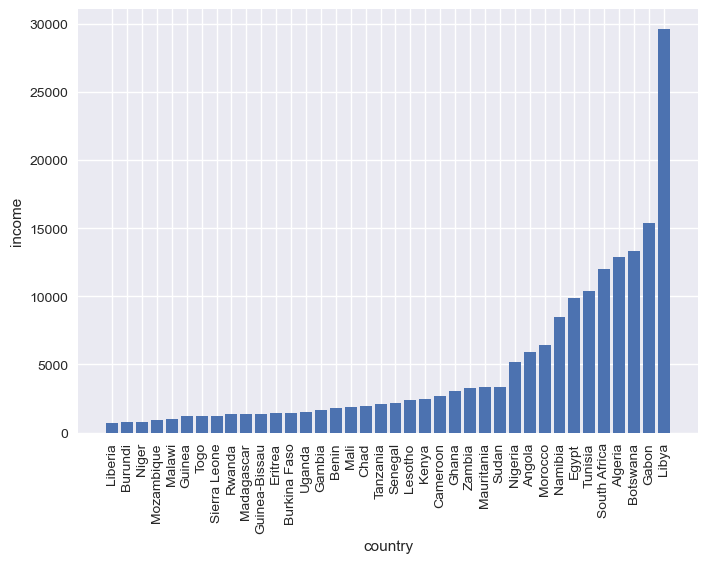

In [37]:
plt.bar (Africa['country'], Africa['income'])
plt.xticks (rotation = 90)
plt.xlabel ('country')
plt.ylabel ('income')

In [38]:
Asia.sort_values( by="gdpp" , inplace = True)

Text(0, 0.5, 'gdpp')

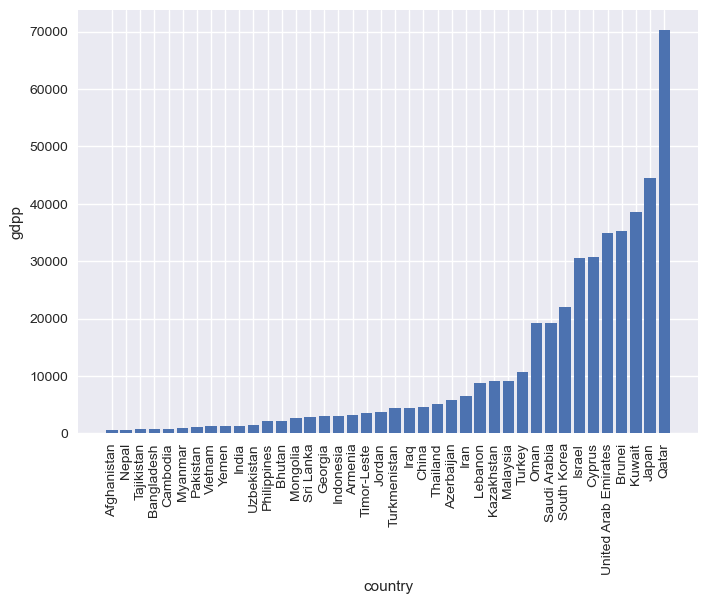

In [39]:
plt.bar (Asia['country'], Asia['gdpp'])
plt.xticks (rotation = 90)
plt.xlabel ('country')
plt.ylabel ('gdpp')

In [40]:
Africa.sort_values( by="gdpp" , inplace = True)

Text(0, 0.5, 'gdpp')

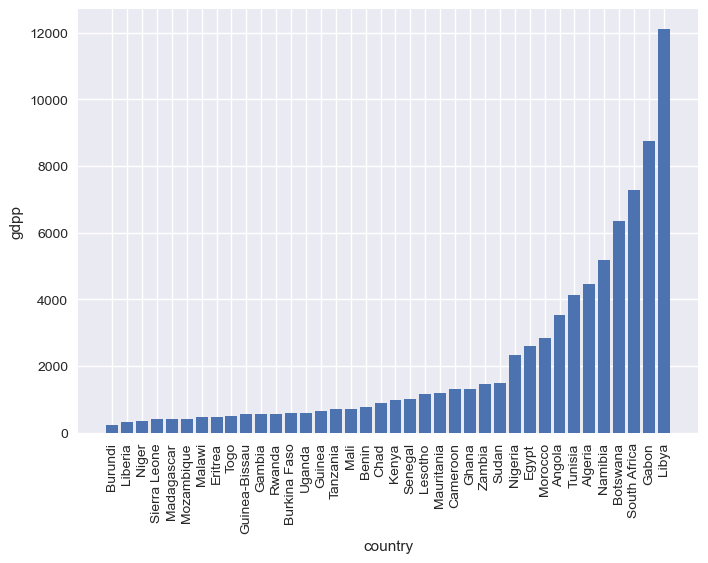

In [41]:
plt.bar (Africa['country'], Africa['gdpp'])
plt.xticks (rotation = 90)
plt.xlabel ('country')
plt.ylabel ('gdpp')

# *Modelling*

# *PCA*

In [42]:
scaler = StandardScaler ()
scaled_features = scaler.fit_transform (df.iloc[:,1:])
dff= pd.DataFrame(scaled_features, columns=df.iloc[:,1:].columns, index=df.index)
dff

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


In [43]:
DF = pd.concat ([df.iloc[:,0], dff], axis=1)
DF

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,Albania,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,Algeria,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,Angola,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,Antigua and Barbuda,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,Venezuela,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,Vietnam,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,Yemen,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


In [44]:
pca = PCA (n_components = 9, svd_solver='full')

pca_df = pca.fit_transform (dff)

explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

### first, I choose 9 component to check the best number of components.

In [46]:
PCAresults1 = pd.DataFrame (pca_df, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'])
PCAresults1

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310,-0.254597,0.383000,0.415076,-0.014148
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677,0.084579,0.248919,-0.221042,0.173316
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475,-0.401696,-0.087214,-0.184162,0.084037
3,-2.932423,1.695555,1.525044,0.839625,-0.273209,-0.547996,-0.440835,-0.355998,-0.091339
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007,-0.206919,0.241978,-0.023681,0.094270
...,...,...,...,...,...,...,...,...,...
162,-0.820631,0.639570,-0.389923,-0.706595,-0.395748,0.009059,-0.098738,0.521886,-0.497803
163,-0.551036,-1.233886,3.101350,-0.115311,2.082581,0.097274,0.206735,-0.078805,-0.275735
164,0.498524,1.390744,-0.238526,-1.074098,1.176081,0.051607,-0.143627,-0.217590,-0.036522
165,-1.887451,-0.109453,1.109752,0.056257,0.618365,-0.540917,0.060256,0.089495,-0.096049


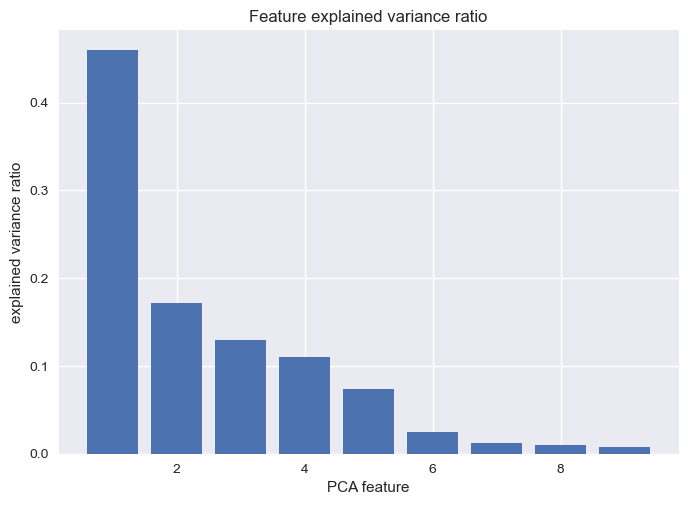

In [47]:
plt.bar(range (1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.xlabel ("PCA feature")
plt.ylabel ("explained variance ratio")
plt.title ("Feature explained variance ratio")
plt.show()

In [48]:
#plt.bar(range (1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
#plt.plot (range (1, len(pca.explained_variance_ratio_)+1), np.cumsum (pca.explained_variance_ratio_),
#         c='red', label = 'Cumulative Explained Variance ratio')

#plt.legend(loc='upper left')
#plt.xlabel ("number of components")
#plt.ylabel ("cumulativeexplained variance ratio")
#plt.title ("scree plot")
#plt.show()

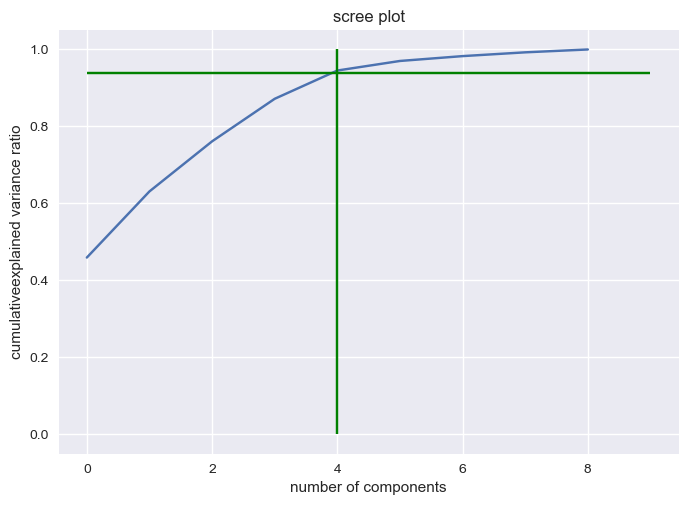

In [49]:
#plt.bar(range (1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
#plt.plot (range (1, len(pca.explained_variance_ratio_)+1), np.cumsum (pca.explained_variance_ratio_),
        # c='red', label = 'Cumulative Explained Variance ratio')
plt.plot (np.cumsum (pca.explained_variance_ratio_))
plt.hlines (y=0.94, xmax=9, xmin=0, color ='g')
plt.vlines (x=4, ymax=1, ymin=0, color = 'g')
#plt.legend(loc='upper left')
plt.xlabel ("number of components")
plt.ylabel ("cumulativeexplained variance ratio")
plt.title ("scree plot")
plt.show()

### number of PCA components = 4   (elbow point)

In [50]:
pca2 = PCA (n_components = 4, svd_solver='full')

pca_df2 = pca2.fit_transform (dff)

explained_variance = pca2.explained_variance_ratio_
explained_variance

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162])

In [51]:
PCAresults2 = pd.DataFrame (pca_df2, columns = ['PC1', 'PC2', 'PC3', 'PC4'])
PCAresults2

,PC1,PC2,PC3,PC4
0,-2.913025,0.095621,-0.718118,1.005255
1,0.429911,-0.588156,-0.333486,-1.161059
2,-0.285225,-0.455174,1.221505,-0.868115
3,-2.932423,1.695555,1.525044,0.839625
4,1.033576,0.136659,-0.225721,-0.847063
...,...,...,...,...
162,-0.820631,0.639570,-0.389923,-0.706595
163,-0.551036,-1.233886,3.101350,-0.115311
164,0.498524,1.390744,-0.238526,-1.074098
165,-1.887451,-0.109453,1.109752,0.056257


### I want to create labels using k-mean clustering algorithm.

In [52]:
kmean_set = {'init': 'random', 'n_init': 10, 'max_iter':300, 'random_state':42}

In [53]:
kmeans = KMeans (n_clusters=4, **kmean_set)
kmeans.fit (dff)
kmean_labels = kmeans.labels_
kmean_labels

array([0, 1, 1, 0, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 3, 1, 0, 1, 1, 1, 0,
       1, 3, 1, 0, 0, 1, 0, 3, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 3, 1,
       3, 1, 1, 1, 1, 0, 0, 1, 1, 3, 3, 0, 0, 1, 3, 0, 3, 1, 1, 0, 0, 1,
       0, 1, 3, 1, 1, 1, 0, 3, 3, 3, 1, 3, 1, 1, 0, 0, 3, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       3, 3, 0, 0, 3, 1, 0, 1, 1, 1, 1, 1, 3, 3, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 3, 1, 0, 1, 3, 1, 1, 0, 1, 3, 3, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 3, 3, 3, 1, 1, 1, 1, 1, 0, 0])

In [54]:
kmeans = KMeans (n_clusters=4).fit(dff)
centroids = kmeans.cluster_centers_
print (centroids)
dfcentroids = pd.DataFrame (centroids, columns = [dff.columns])
dfcentroids

[[-0.43226529  0.0241699  -0.19361108  0.07069217 -0.211679   -0.0345412
   0.27646609 -0.43917324 -0.32703124]
 [ 1.34541883 -0.45967186 -0.1895969  -0.22567743 -0.68713515  0.39226703
  -1.26429235  1.32908188 -0.60530769]
 [-0.82860929  0.17262066  0.85918977 -0.29637276  1.46227512 -0.47818851
   1.10764922 -0.76368146  1.66190214]
 [-0.84900324  4.93567278 -0.00816303  4.54805768  2.4395424  -0.50420614
   1.22682431 -1.03886271  2.44079735]]


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,-0.432265,0.024170,-0.193611,0.070692,-0.211679,-0.034541,0.276466,-0.439173,-0.327031
1,1.345419,-0.459672,-0.189597,-0.225677,-0.687135,0.392267,-1.264292,1.329082,-0.605308
2,-0.828609,0.172621,0.859190,-0.296373,1.462275,-0.478189,1.107649,-0.763681,1.661902
3,-0.849003,4.935673,-0.008163,4.548058,2.439542,-0.504206,1.226824,-1.038863,2.440797


In [55]:
realdfcentroids = scaler.inverse_transform (dfcentroids)
realdfcentroids = pd.DataFrame (realdfcentroids, columns = [dff.columns])
realdfcentroids

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,20.889535,41.769535,6.285465,48.596512,13076.162791,7.417802,73.006977,2.285116,6988.069767
1,92.366667,28.546229,6.296458,41.443040,3937.770833,11.915938,59.345833,4.953958,1902.916667
2,4.953333,45.826667,9.168667,39.736667,45250.000000,2.742200,80.376667,1.795333,43333.333333
3,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667


In [56]:
kmean_labels_df = pd.concat ([df, pd.Series(kmeans.labels_, name = 'clustered')], axis = 1)    # on original dataset
kmean_labels_df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clustered
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1


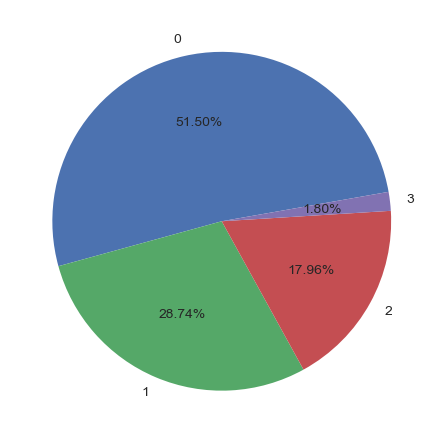

In [57]:
plt.pie (kmean_labels_df.clustered.value_counts() , labels = ["0", "1", "2", "3"],
         radius=1 , startangle = 10, autopct = '%1.2f%%')
plt.show()

In [58]:
kmean_labels_df ['clustered'].value_counts()

clustered
0    86
1    48
2    30
3     3
Name: count, dtype: int64

## Countries with Low income and High child mortality are economically weak. and they're in priority to receive help.

In [59]:
#kmean_labels_df.sort_values( by="child_mort" , inplace = True)
#kmean_labels_df

In [60]:
#kmean_labels_df.sort_values( by="income" , inplace = True)
#kmean_labels_df

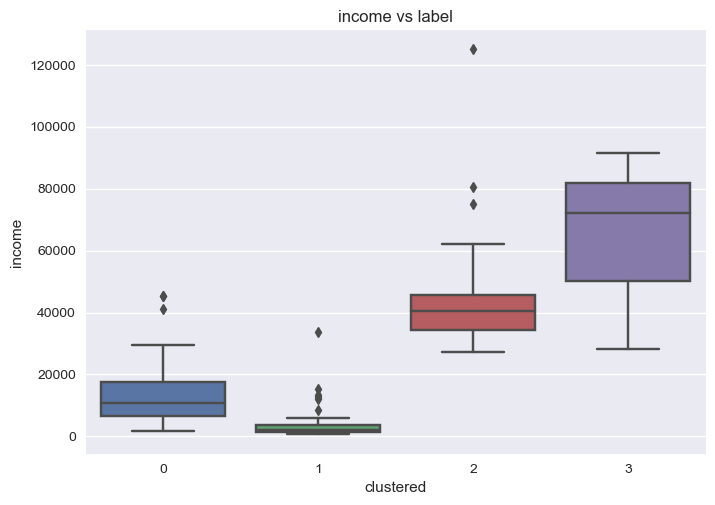

In [61]:
sns.boxplot (data =kmean_labels_df, x = 'clustered', y = 'income')
plt.title ('income vs label')
plt.show()

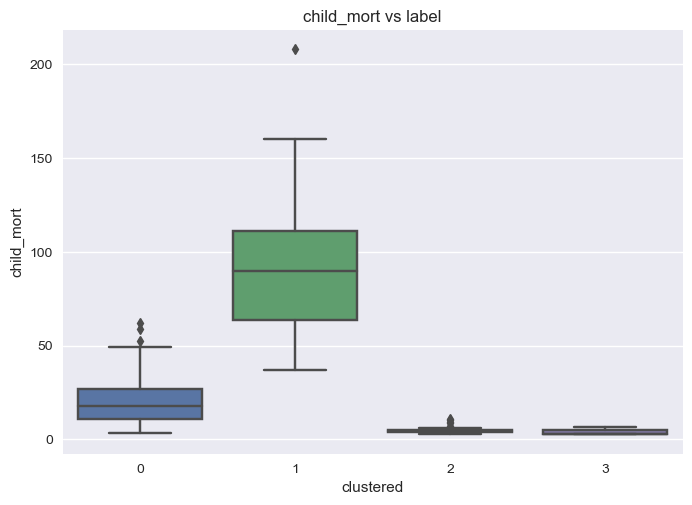

In [62]:
sns.boxplot (data =kmean_labels_df, x = 'clustered', y = 'child_mort')
plt.title ('child_mort vs label')
plt.show()

### cluster 1 with highest child mortality and lowest income needed more help. then cluster 0, 2 and 3, respectivly.

In [79]:
final_df = kmean_labels_df.copy()

In [80]:
final_df ['clustered'] = final_df ['clustered'].replace (2, "they don't need help")
final_df ['clustered'] = final_df ['clustered'].replace (0, "they need help")
final_df ['clustered'] = final_df ['clustered'].replace (3, "they don't need help at all")
final_df ['clustered'] = final_df ['clustered'].replace (1, 'they need help more than other')
final_df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clustered
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,they need help more than other
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,they need help
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,they need help
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,they need help more than other
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,they need help
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,they need help
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,they need help
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,they need help
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,they need help more than other


In [81]:
merged_finaldf_with_world = pd.merge (final_df, world[['name', 'continent']], left_on = 'country', right_on = 'name', how = 'left')
gp_continent1 = merged_finaldf_with_world.groupby ('continent')

In [82]:
merged2 = world.merge (final_df, how = 'left', left_on = 'name', right_on = 'country')
merged2

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clustered
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,24.1,57.8,4.86,63.9,7350.0,4.23,65.3,2.67,3650.0,they need help
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,71.9,18.7,6.01,29.1,2090.0,9.25,59.3,5.43,702.0,they need help more than other
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,5.6,29.1,11.30,31.0,40700.0,2.87,81.3,1.63,47400.0,they don't need help
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",Serbia,7.6,32.9,10.40,47.9,12700.0,5.88,74.7,1.40,5410.0,they need help
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",Montenegro,6.8,37.0,9.11,62.7,14000.0,1.60,76.4,1.77,6680.0,they need help
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


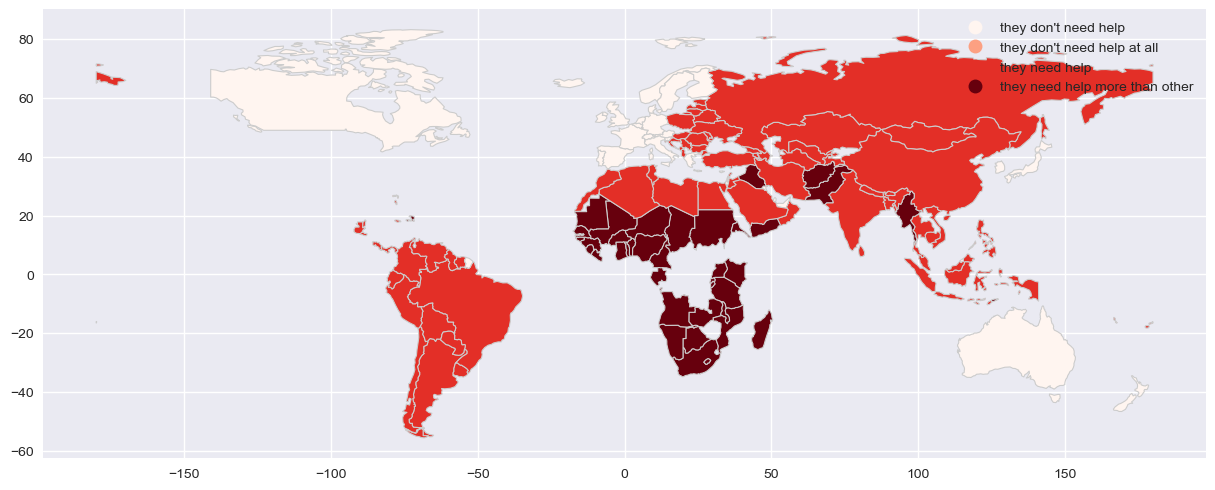

In [101]:
fig, ax = plt.subplots (1, 1, figsize = (15, 15))
merged2.plot (column = 'clustered', cmap = 'Reds', linewidth = 0.8, ax = ax, edgecolor = '0.8', legend = True)
plt.show()

## The countries that need help more than other countries:

In [99]:
country1 = final_df[final_df.clustered == 'they need help more than other']
country1.reset_index (drop = True, inplace = True)
country1

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clustered
0,Afghanistan,90.2,10.000,7.58,44.9000,1610,9.440,56.2,5.82,553,they need help more than other
1,Angola,119.0,62.300,2.85,42.9000,5900,22.400,60.1,6.16,3530,they need help more than other
2,Benin,111.0,23.800,4.10,37.2000,1820,0.885,61.8,5.36,758,they need help more than other
3,Botswana,52.5,43.600,8.30,51.3000,13300,8.920,57.1,2.88,6350,they need help more than other
4,Burkina Faso,116.0,19.200,6.74,29.6000,1430,6.810,57.9,5.87,575,they need help more than other
5,Burundi,93.6,8.920,11.60,39.2000,764,12.300,57.7,6.26,231,they need help more than other
6,Cameroon,108.0,22.200,5.13,27.0000,2660,1.910,57.3,5.11,1310,they need help more than other
7,Central African Republic,149.0,11.800,3.98,26.5000,888,2.010,47.5,5.21,446,they need help more than other
8,Chad,150.0,36.800,4.53,43.5000,1930,6.390,56.5,6.59,897,they need help more than other
9,Comoros,88.2,16.500,4.51,51.7000,1410,3.870,65.9,4.75,769,they need help more than other


### Countries that need help. but they're not in first priority.

In [100]:
country2 = final_df[final_df.clustered == 'they need help']
country2.reset_index (drop = True, inplace = True)
country2

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clustered
0,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,they need help
1,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,they need help
2,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,they need help
3,Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300,they need help
4,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220,they need help
...,...,...,...,...,...,...,...,...,...,...,...
81,Uruguay,10.6,26.3,8.35,25.4,17100,4.91,76.4,2.08,11900,they need help
82,Uzbekistan,36.3,31.7,5.81,28.5,4240,16.50,68.8,2.34,1380,they need help
83,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,they need help
84,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,they need help
